# Back-propagation（BP)

Backpropagation is an algorithm used for training neural networks. It is an optimization method based on gradient descent, used to adjust the weights of a neural network to minimize the loss function of the network on a training set.

Specifically, the backpropagation algorithm calculates the contribution of each weight to the loss function by propagating the error backwards through the neural network. This error propagation allows us to compute the contribution of each neuron to the error and update the network's weights accordingly to minimize the overall loss function of the network.

Originally, BP referred only to the process of the gradient of the loss function with respect to the parameters flowing backwards through the network. However, it is now commonly understood to refer to the entire training method of neural networks, which consists of two stages: error propagation and parameter updating.

Today, we will use the basic deep neural network as an example to demonstrate the entire process of backpropagation, and implement it using Numpy in detail. Please look at this, a normal 3 layers neural network structure:

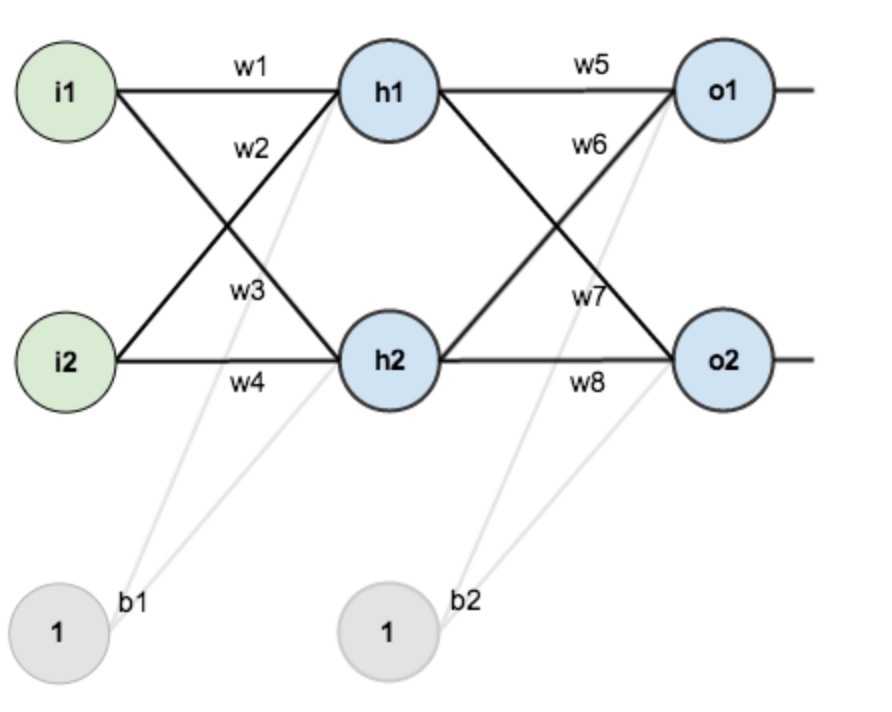

The backpropagation algorithm is typically divided into two stages. The first stage is the forward pass, which takes the input data and passes it through the network to compute the output. During this process, each neuron calculates its output and passes it on to the next neuron.

The second stage is the backward pass, which propagates the error from the output layer back to the input layer and computes the contribution of each neuron to the loss function. During this process, each neuron calculates its error and passes it back to the previous neuron, until the error has propagated all the way to the input layer.

## Forward pass

Let's assume that the neural network parameters in the above diagram are as follows:

Input data: i1=0.05, i2=0.10

Output data: o1=0.01, o2=0.99

Initial weights: w1=0.15, w2=0.20, w3=0.25, w4=0.30, w5=0.40, w6=0.45, w7=0.50, w8=0.55.

Bias: b1=0.35, b2=0.6

Our purpose is to make the output as close as the sample data(0.01, 0.99)

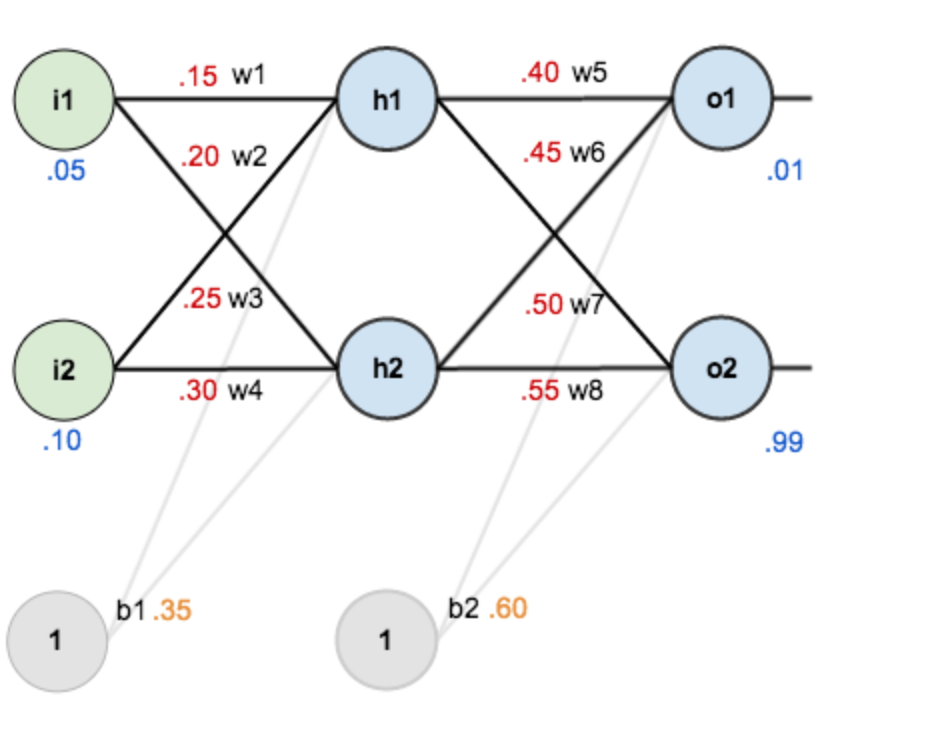

Now we can calculate the value of every nueral:

input of h1:

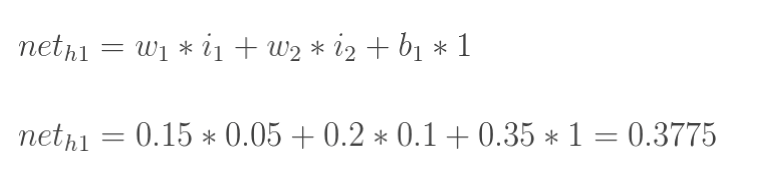

output of h1(we use sigmoid as activate function):


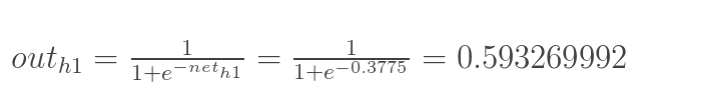

And output of h2 with same way:
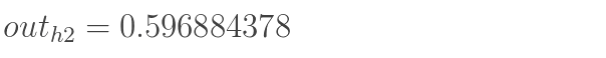

### Exercise

Please write down the fomulars of input and output of h2.

Then, we can get the output of o1 and o2:
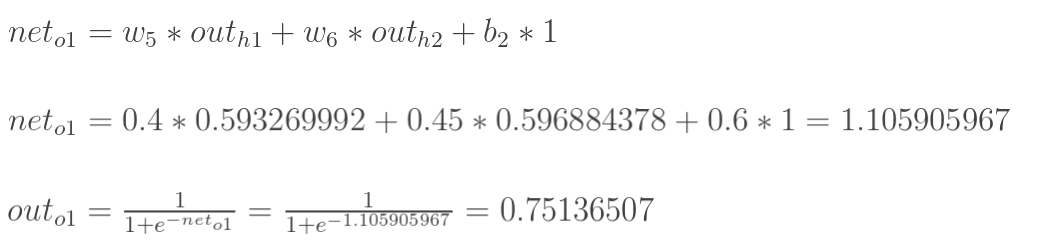

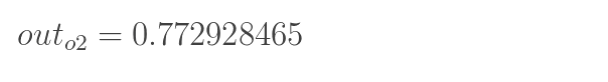

### Exercise

Please write down the fomulars of input and output of o2.

The forward propagation process ends here and we obtain the output value [0.75136079, 0.772928465]. It is still far from the actual value [0.01, 0.99]. Now we will perform backpropagation of the error, update the weights, and recalculate the output.

## Backward pass



First, let's calculate the total square error, this is the function:
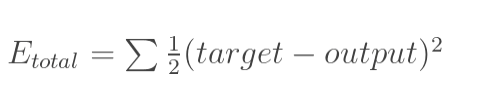

Since we have two outputs, the total error is the sum of o1 and o2:
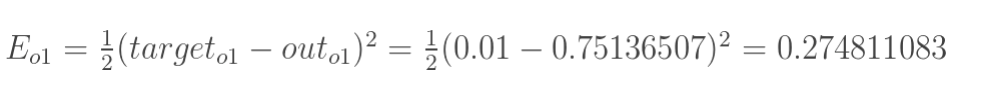

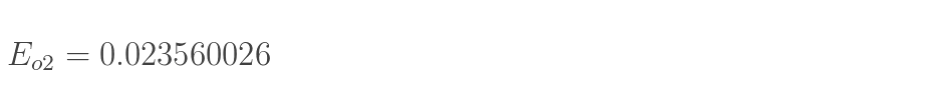

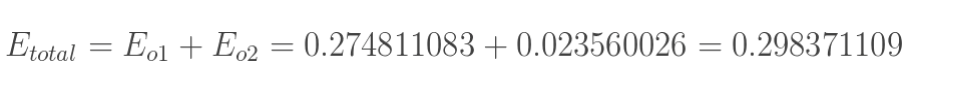

If we want to know how much a weight_num has influenced the total error, we need to derivate it. Take w5 as an example:
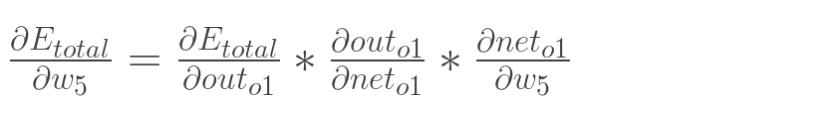

If you don't know why the above equation holds, you need to know about the **chain rule**：

The chain rule is a fundamental concept in calculus that allows you to compute the derivative of a function that is composed of multiple functions. Suppose you have two functions f(x) and g(x), and a third function h(x) that is defined as h(x) = f(g(x)). The chain rule tells you that the derivative of h(x) with respect to x is given by:

h'(x) = f'(g(x)) * g'(x)

Now let's calculate the equation:
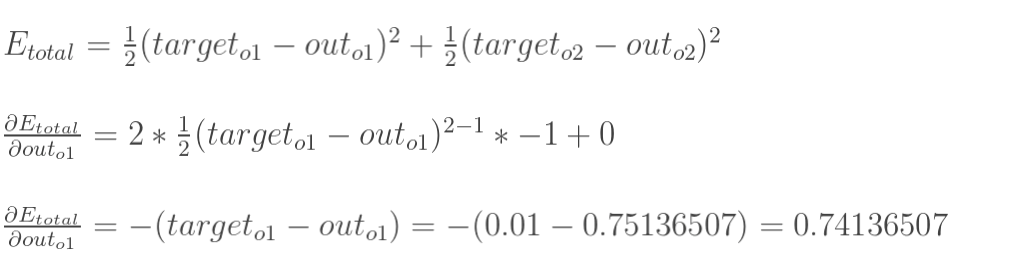

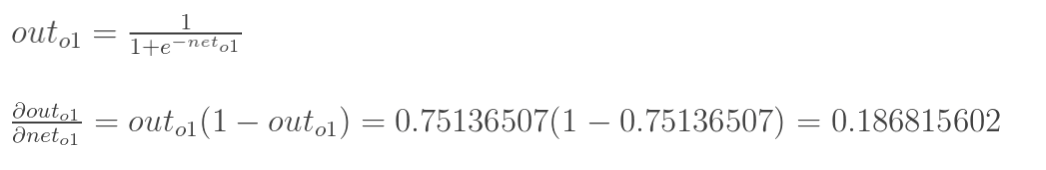
This is the derivative of the activation function sigmoid

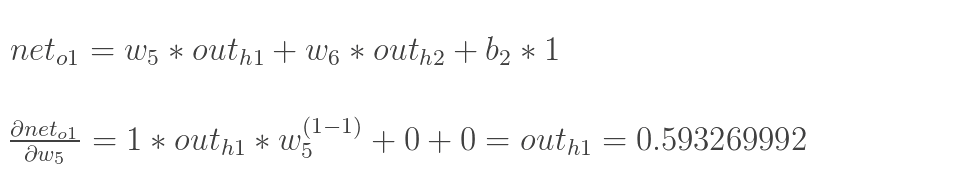

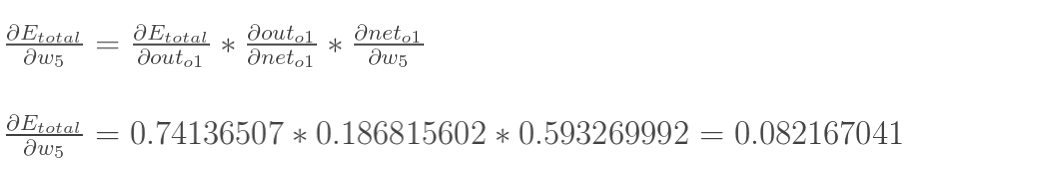

Finally, we can renew the value of w5:
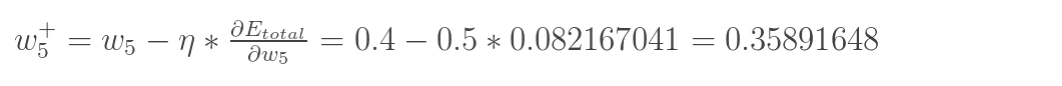
Eta is the learning rate, suppose it is 0.5.

In the same way, we can get new w6, w7, w8:
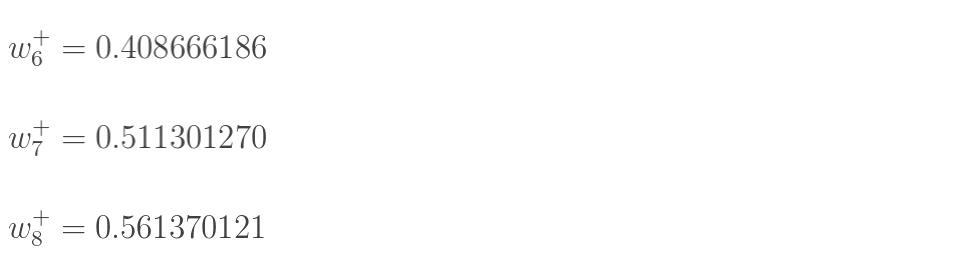

We can also update the value of w1-w4, just remember, h1 will accept the value from both o1 and o2, so we should calculate them both.

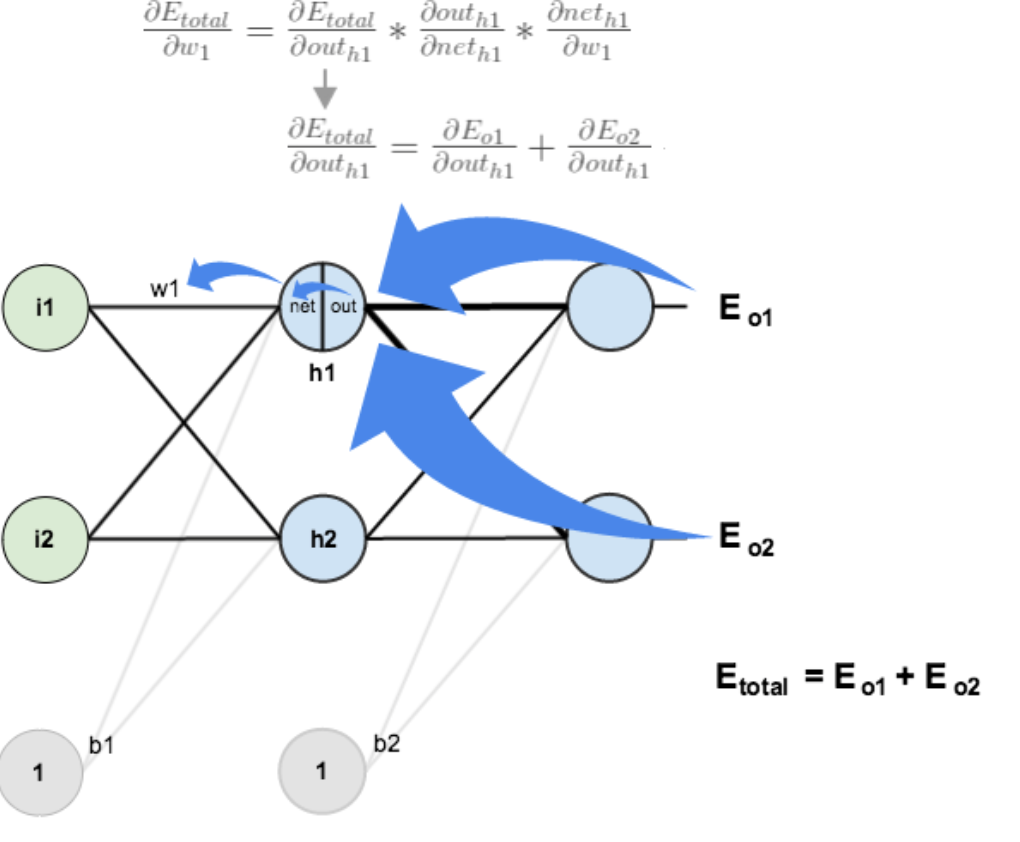

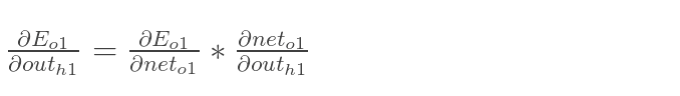

First, we calculate the d(Eo1)/d(outh1):
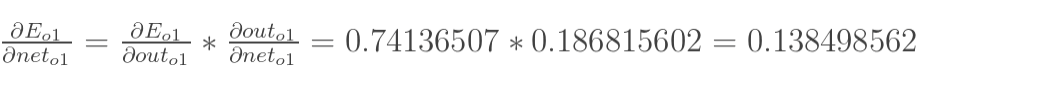

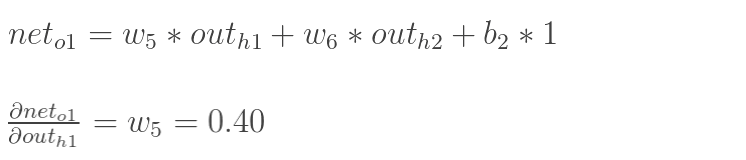

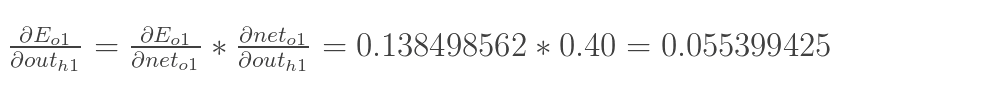

In the same way:
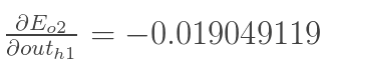

Add the two to get the total:
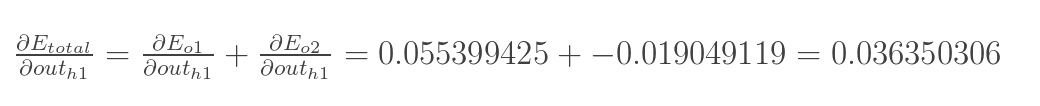

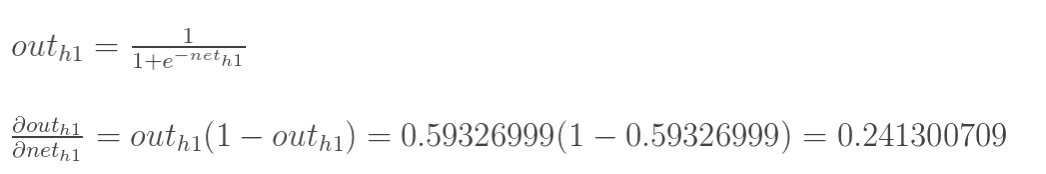

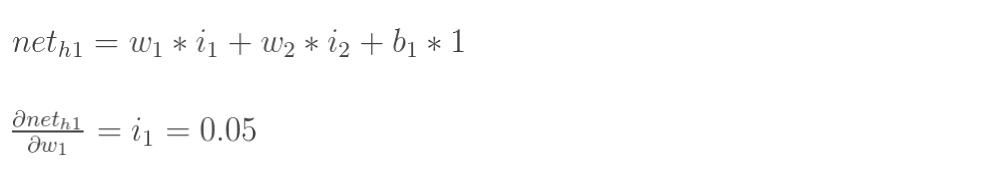

Finally, the three are multiplied together:
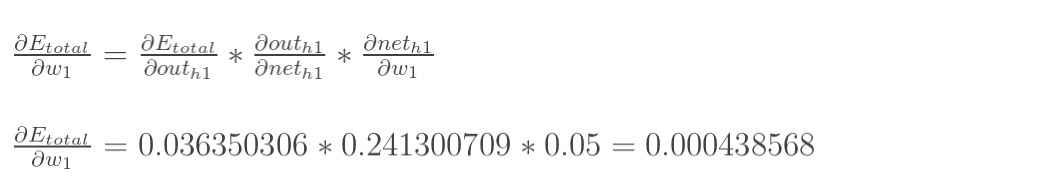

Finally, update the weight of w1:
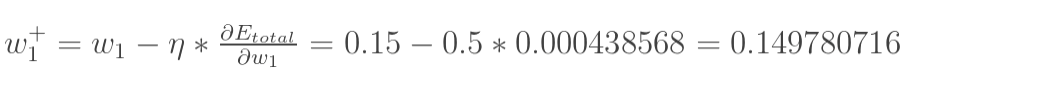



And others:
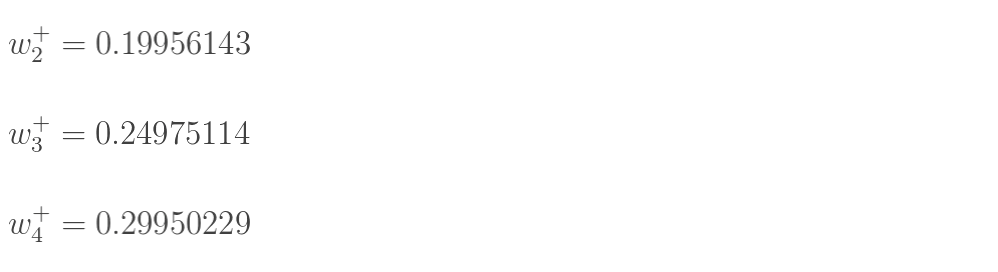

Now we finished the backward pass. In the next step, we can calculate the total error again by using the new weights.

## Code example

This is a code of back propogation. The output of this code is the total error. As we can see, after 10,000 iterations, the total error becomes very small.

In [6]:
#coding:utf-8
import random
import math


class NeuralNetwork:
    LEARNING_RATE = 0.5

    def __init__(self, num_inputs, num_hidden, num_outputs, hidden_layer_weights = None, hidden_layer_bias = None, output_layer_weights = None, output_layer_bias = None):
        self.num_inputs = num_inputs

        self.hidden_layer = NeuronLayer(num_hidden, hidden_layer_bias)
        self.output_layer = NeuronLayer(num_outputs, output_layer_bias)

        self.init_weights_from_inputs_to_hidden_layer_neurons(hidden_layer_weights)
        self.init_weights_from_hidden_layer_neurons_to_output_layer_neurons(output_layer_weights)

    def init_weights_from_inputs_to_hidden_layer_neurons(self, hidden_layer_weights):
        weight_num = 0
        for h in range(len(self.hidden_layer.neurons)):
            for i in range(self.num_inputs):
                if not hidden_layer_weights:
                    self.hidden_layer.neurons[h].weights.append(random.random())
                else:
                    self.hidden_layer.neurons[h].weights.append(hidden_layer_weights[weight_num])
                weight_num += 1

    def init_weights_from_hidden_layer_neurons_to_output_layer_neurons(self, output_layer_weights):
        weight_num = 0
        for o in range(len(self.output_layer.neurons)):
            for h in range(len(self.hidden_layer.neurons)):
                if not output_layer_weights:
                    self.output_layer.neurons[o].weights.append(random.random())
                else:
                    self.output_layer.neurons[o].weights.append(output_layer_weights[weight_num])
                weight_num += 1

    def inspect(self):
        print('------')
        print('* Inputs: {}'.format(self.num_inputs))
        print('------')
        print('Hidden Layer')
        self.hidden_layer.inspect()
        print('------')
        print('* Output Layer')
        self.output_layer.inspect()
        print('------')

    def feed_forward(self, inputs):
        hidden_layer_outputs = self.hidden_layer.feed_forward(inputs)
        return self.output_layer.feed_forward(hidden_layer_outputs)

    def train(self, training_inputs, training_outputs):
        self.feed_forward(training_inputs)

        
        pd_errors_wrt_output_neuron_total_net_input = [0] * len(self.output_layer.neurons)
        for o in range(len(self.output_layer.neurons)):

            # ∂E/∂zⱼ
            pd_errors_wrt_output_neuron_total_net_input[o] = self.output_layer.neurons[o].calculate_pd_error_wrt_total_net_input(training_outputs[o])

      
        pd_errors_wrt_hidden_neuron_total_net_input = [0] * len(self.hidden_layer.neurons)
        for h in range(len(self.hidden_layer.neurons)):

            # dE/dyⱼ = Σ ∂E/∂zⱼ * ∂z/∂yⱼ = Σ ∂E/∂zⱼ * wᵢⱼ
            d_error_wrt_hidden_neuron_output = 0
            for o in range(len(self.output_layer.neurons)):
                d_error_wrt_hidden_neuron_output += pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].weights[h]

            # ∂E/∂zⱼ = dE/dyⱼ * ∂zⱼ/∂
            pd_errors_wrt_hidden_neuron_total_net_input[h] = d_error_wrt_hidden_neuron_output * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_input()


        for o in range(len(self.output_layer.neurons)):
            for w_ho in range(len(self.output_layer.neurons[o].weights)):

                # ∂Eⱼ/∂wᵢⱼ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢⱼ
                pd_error_wrt_weight = pd_errors_wrt_output_neuron_total_net_input[o] * self.output_layer.neurons[o].calculate_pd_total_net_input_wrt_weight(w_ho)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.output_layer.neurons[o].weights[w_ho] -= self.LEARNING_RATE * pd_error_wrt_weight

        
        for h in range(len(self.hidden_layer.neurons)):
            for w_ih in range(len(self.hidden_layer.neurons[h].weights)):

                # ∂Eⱼ/∂wᵢ = ∂E/∂zⱼ * ∂zⱼ/∂wᵢ
                pd_error_wrt_weight = pd_errors_wrt_hidden_neuron_total_net_input[h] * self.hidden_layer.neurons[h].calculate_pd_total_net_input_wrt_weight(w_ih)

                # Δw = α * ∂Eⱼ/∂wᵢ
                self.hidden_layer.neurons[h].weights[w_ih] -= self.LEARNING_RATE * pd_error_wrt_weight

    def calculate_total_error(self, training_sets):
        total_error = 0
        for t in range(len(training_sets)):
            training_inputs, training_outputs = training_sets[t]
            self.feed_forward(training_inputs)
            for o in range(len(training_outputs)):
                total_error += self.output_layer.neurons[o].calculate_error(training_outputs[o])
        return total_error

class NeuronLayer:
    def __init__(self, num_neurons, bias):

       
        self.bias = bias if bias else random.random()

        self.neurons = []
        for i in range(num_neurons):
            self.neurons.append(Neuron(self.bias))

    def inspect(self):
        print('Neurons:', len(self.neurons))
        for n in range(len(self.neurons)):
            print(' Neuron', n)
            for w in range(len(self.neurons[n].weights)):
                print('  Weight:', self.neurons[n].weights[w])
            print('  Bias:', self.bias)

    def feed_forward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.calculate_output(inputs))
        return outputs

    def get_outputs(self):
        outputs = []
        for neuron in self.neurons:
            outputs.append(neuron.output)
        return outputs

class Neuron:
    def __init__(self, bias):
        self.bias = bias
        self.weights = []

    def calculate_output(self, inputs):
        self.inputs = inputs
        self.output = self.squash(self.calculate_total_net_input())
        return self.output

    def calculate_total_net_input(self):
        total = 0
        for i in range(len(self.inputs)):
            total += self.inputs[i] * self.weights[i]
        return total + self.bias

    
    def squash(self, total_net_input):
        return 1 / (1 + math.exp(-total_net_input))


    def calculate_pd_error_wrt_total_net_input(self, target_output):
        return self.calculate_pd_error_wrt_output(target_output) * self.calculate_pd_total_net_input_wrt_input();

   
    def calculate_error(self, target_output):
        return 0.5 * (target_output - self.output) ** 2


    def calculate_pd_error_wrt_output(self, target_output):
        return -(target_output - self.output)


    def calculate_pd_total_net_input_wrt_input(self):
        return self.output * (1 - self.output)


    def calculate_pd_total_net_input_wrt_weight(self, index):
        return self.inputs[index]




nn = NeuralNetwork(2, 2, 2, hidden_layer_weights=[0.15, 0.2, 0.25, 0.3], hidden_layer_bias=0.35, output_layer_weights=[0.4, 0.45, 0.5, 0.55], output_layer_bias=0.6)
for i in range(10000):
    nn.train([0.05, 0.1], [0.01, 0.09])
    print(i, round(nn.calculate_total_error([[[0.05, 0.1], [0.01, 0.09]]]), 9))




0 0.476998757
1 0.461369429
2 0.445427858
3 0.429235296
4 0.412860293
5 0.396377469
6 0.379865924
7 0.363407337
8 0.347083859
9 0.330975933
10 0.315160159
11 0.299707365
12 0.284680974
13 0.270135765
14 0.256117071
15 0.242660411
16 0.229791548
17 0.217526898
18 0.205874218
19 0.194833509
20 0.184398037
21 0.174555407
22 0.165288635
23 0.156577163
24 0.148397792
25 0.140725515
26 0.133534229
27 0.126797337
28 0.120488244
29 0.114580744
30 0.109049325
31 0.103869388
32 0.099017411
33 0.094471044
34 0.090209175
35 0.086211948
36 0.082460763
37 0.07893825
38 0.075628228
39 0.072515661
40 0.069586595
41 0.0668281
42 0.06422821
43 0.061775857
44 0.059460809
45 0.057273613
46 0.055205536
47 0.053248511
48 0.051395086
49 0.049638375
50 0.047972015
51 0.046390122
52 0.044887254
53 0.043458377
54 0.042098829
55 0.040804291
56 0.039570762
57 0.038394528
58 0.037272145
59 0.036200414
60 0.035176359
61 0.034197217
62 0.033260414
63 0.032363552
64 0.031504398
65 0.030680869
66 0.02989102
67 0.02913

## Homework

1. Try to write down the steps to update w2 and w6 (just the equations, no need to calculate the result). If you find it is hard to write math fomulars on computer, you can write it down with a pen and take a photo.

2. Change the parameters in the code(layer_weights, bias, etc), run the code and get the results.